# Percentiles, Cuartiles y Cuantiles

- **Percentiles:** Dividen un conunto de datos en 100 partes iguales, permitiendo una compresión detallada de la distrbución estadística. Se usa para optimización de algoritmos, entender la distribución del error, ajustes de precisión.
- **Cuartiles:** Dividen los datos en 4 partes iguales, propocionando información sobre la dispersión y concentración de valores.
- **Cuantiles:** Los cuantiles son una generalización de los percentiles y los cuartiles, dividiendo los datos en cualquier número n de partes iguales. 

### 1. Cálculo de valores Percentiles

$$
{k} = \frac{P(n+1)}{100}
$$
Calcular cualquier percentil "P" de un conjunto de datos con "n" elementos, ordenados de menor a mayor.
- P= percentil a calcular
- n+1 = Tamaño del conjunto + 1
- 100 = Divisiones del cuantil
- k = es un índice, nos devuelve la posición que ocupa dentro del dataset.
  - "Xk" es el valor en esa posición por ejemplo x1,x2,x3... 

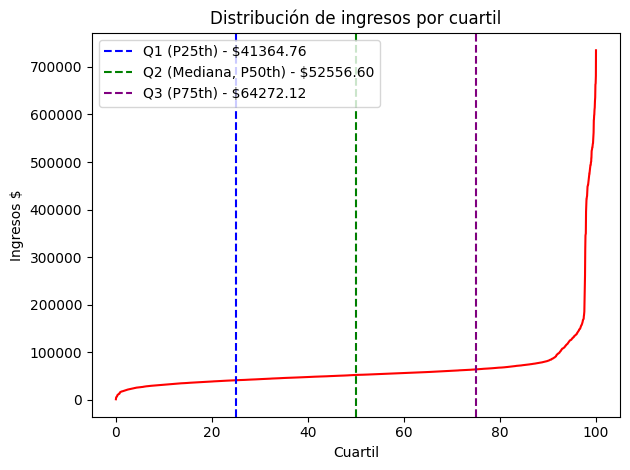

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
ingresos_base = np.random.normal(loc=50000, scale=15000, size=3800)
ingresos_altos = np.random.normal(loc=120000, scale=30000, size=300)
ingresos_very_altos = np.random.normal(loc=500000, scale=100000, size=100)
datos = np.concatenate([ingresos_base, ingresos_altos, ingresos_very_altos])
datos = np.sort(datos)

# Crear un array de percentiles desde 0 a 100
p_array = np.linspace(0, 100, num=datos.size)

# Calculamos los cuartiles
Q1 = np.percentile(datos, 25)
Q2 = np.percentile(datos, 50)  # Esto es también la mediana
Q3 = np.percentile(datos, 75)

# Creamos la figura y el eje
fig, ax = plt.subplots()

# Dibujamos la curva de distribución de ingresos
ax.plot(p_array, datos, color='red')

# Añadimos las barras verticales para los cuartiles
ax.axvline(25, color='blue', linestyle='--', label=f'Q1 (P25th) - ${Q1:.2f}')
ax.axvline(50, color='green', linestyle='--', label=f'Q2 (Mediana, P50th) - ${Q2:.2f}')
ax.axvline(75, color='purple', linestyle='--', label=f'Q3 (P75th) - ${Q3:.2f}')

# Configuramos las etiquetas y la leyenda
ax.set_xlabel('Cuartil')
ax.set_ylabel('Ingresos $')
ax.set_title('Distribución de ingresos por cuartil')
ax.legend()

# Mostramos la gráfica
plt.tight_layout()
plt.show()

La posicion "K" es un valor discreto.

Por ejemplo: Supongamos que queremos calcular el percentil 70.
$$
X = \{5, 7, 8, 9, 10, 12, 14, 16, 18, 20\}
$$
$$
{k} = \frac{P(n+1)}{100} = \frac{70(10+1)}{100} = 7.7
$$

La posición 7.7 tiene que ser algún punto entre la posición 7 y la poscisión 8 que desconocemos.
Podemos calcuar la media de los dos valores en esas posiciones. Pero no es preciso.

### 1.2- Interpolación
Es el proceso de calcular o estimar un valor desconocido dentro de un ranngo de valores conocidos. Para predecir datos intermedios y completar huecos en los conjuntos de datos.
- **Lineal:** Conecta dos puntos conocidos con una línea recta para estimar valores intermedios.
- **Polinómica:** Ajusta una función polinómica a los puntos conocidos y utliza esta función para estimar valores adicionales.
- **Splines:** Crea curvas suaves a través de puntos conocidos, lo que resulta en una interpolación ás precisa y continua.
    

### 1.3- Reolver el dilema interpolando
La posición 7 y 8 es $$X =\{5, 7, 8, 9, 10, 12, \textcolor{blue}{\boxed{14}}, 16, \textcolor{blue}{\boxed{18}}, 20\}$$
esto se traduce a dos puntos con coordenadas:
**p1=(7,14) y p2=(8,16)
Se traza una linea entre ambas coordenaas y calcula su punto medio de la recta.**

Esta es la fórmula de la interpolación lineal:

$$ y = y_1 + \frac{(x - x_1) (y_2 - y_1)}{x_2 - x_1} $$

Esta es la fórmula adaptada:

$$ x_k = 14 + \frac{(7.7 - 7) (16 - 14)}{8 - 7} $$
$$ x_k = 15.4 $$

In [11]:
# Generar datos aleatorios para las calificaciones
np.random.seed(0)
calificaciones = np.random.randint(60, 100, size=100)

# Crear un DataFrame de pandas
df = pd.DataFrame({
    'ID': np.arange(1, 101),
    'Calificacion': calificaciones
})

   ID  Calificacion
0   1            60
1   2            63
2   3            63
3   4            99
4   5            69
     ID  Calificacion
95   96            63
96   97            94
97   98            73
98   99            99
99  100            81
Percentiles usando Numpy: [68.75 78.5  91.  ]
Percentiles usando Pandas: 0.25    68.75
0.50    78.50
0.75    91.00
Name: Calificacion, dtype: float64


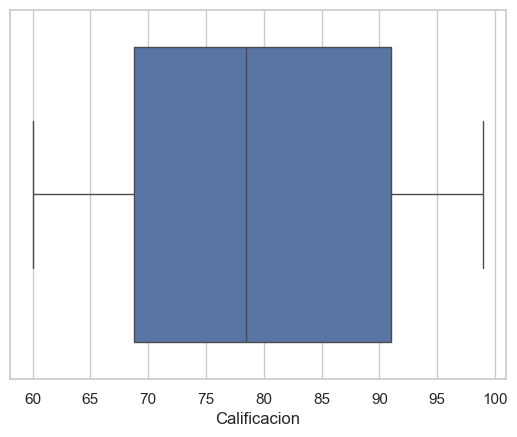

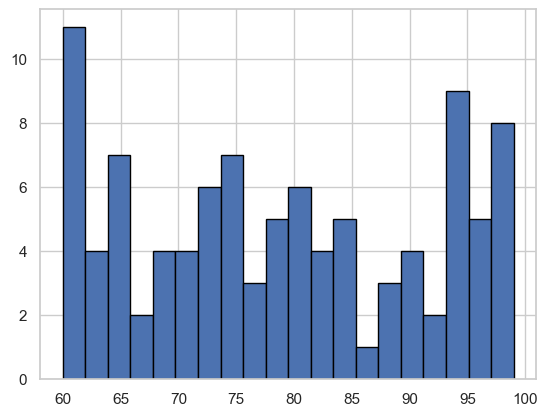

In [18]:
# Cargar el conjunto de datos desde la ruta donde lo guardamos
df_cargado= df

# Exploración inicial
print(df_cargado.head())
print(df_cargado.tail())

# Calcular percentiles
#con Numpy
percentiles_np = np.percentile(df_cargado['Calificacion'], [25, 50, 75]) #recibe como parametro Q, los percentiles
print(f"Percentiles usando Numpy: {percentiles_np}")
#Con Pandas
percentiles_pd = df_cargado['Calificacion'].quantile([0.25, 0.5, 0.75])
print(f"Percentiles usando Pandas: {percentiles_pd}")

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_cargado['Calificacion'])
plt.show()

plt.hist(df_cargado['Calificacion'], bins=20, edgecolor='black')
plt.show()


<hr>

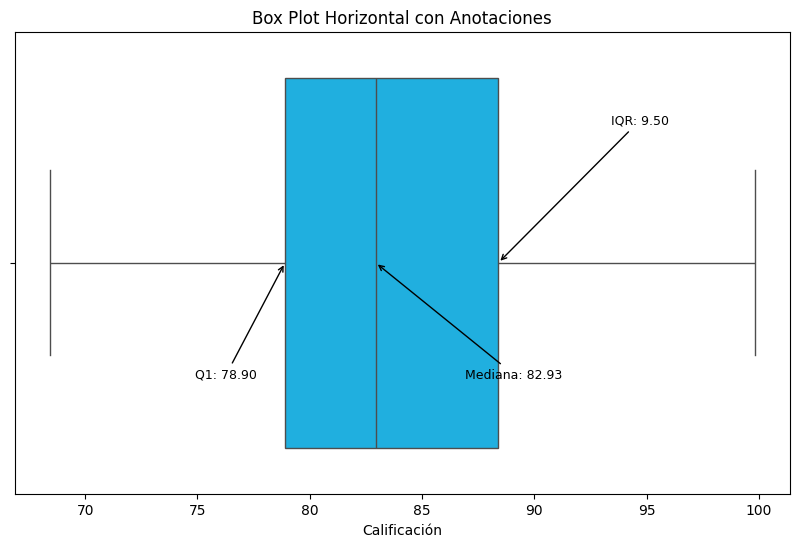

In [15]:
# Datos de ejemplo
data = np.random.normal(84, 7, 100)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h', color='#00bfff')

# Añadir anotaciones
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
mediana = np.median(data)
IQR = Q3 - Q1

# Anotaciones
plt.annotate(f'Q1: {Q1:.2f}', xy=(Q1, 0), xytext=(Q1 - 4, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)
plt.annotate(f'Mediana: {mediana:.2f}', xy=(mediana, 0), xytext=(mediana + 4, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)
plt.annotate(f'IQR: {IQR:.2f}', xy=(Q3, 0), xytext=(Q3 + 5, -0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)

plt.title('Box Plot Horizontal con Anotaciones')
plt.xlabel('Calificación')
plt.show()

<hr>

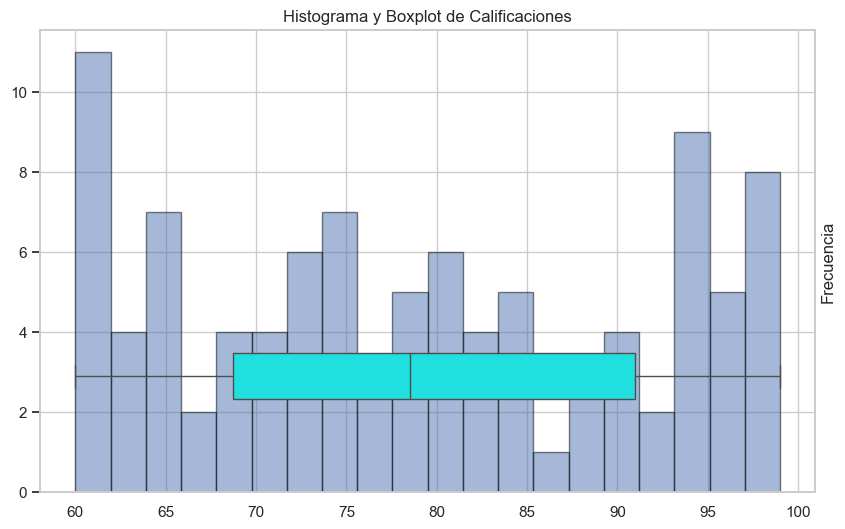

In [16]:
import seaborn as sns

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un histograma
plt.figure(figsize=(10,6))
plt.hist(df_cargado['Calificacion'], bins=20, edgecolor='black', alpha=0.5, label='Histograma')

# Crear un eje secundario para el boxplot
ax2 = plt.gca().twinx()

# Dibujar el boxplot en el eje secundario
sns.boxplot(x=df_cargado['Calificacion'], ax=ax2, color='cyan', width=0.2)

# Configurar las etiquetas de los ejes y el título
plt.title('Histograma y Boxplot de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Ajustar el eje secundario para que el boxplot no se superponga con el histograma
ax2.set_ylim(-0.5, 1.5)
ax2.set_yticks([])  # Eliminar las etiquetas del eje y del boxplot para claridad

# Mostrar la gráfica
plt.show()

<hr>

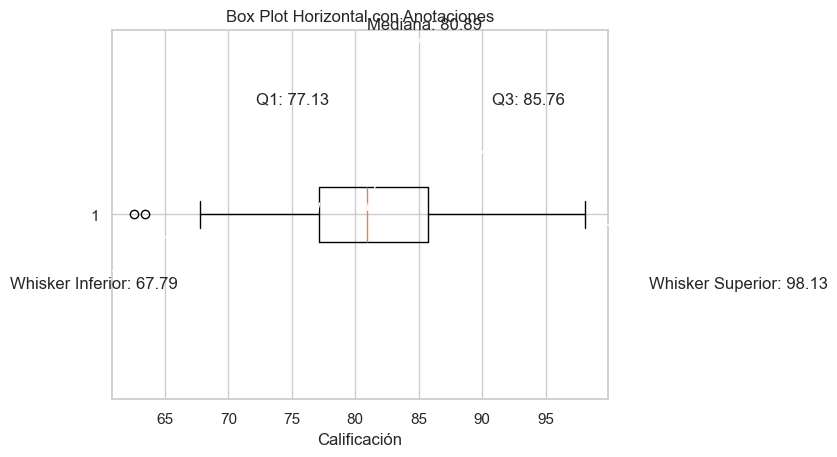

In [17]:
# Datos
data = np.random.normal(82, 7, 100)

# Boxplot
fig, ax = plt.subplots()
ax.boxplot(data, vert=False)

# Títulos y labels
ax.set_title('Box Plot Horizontal con Anotaciones')
ax.set_xlabel('Calificación')

# Anotaciones para Q1, Mediana y Q3
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_whisker = np.min(data[data > q1 - 1.5*iqr])
upper_whisker = np.max(data[data < q3 + 1.5*iqr])

ax.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(q1-5, 1.3), arrowprops=dict(arrowstyle="->"))
ax.annotate(f'Mediana: {q2:.2f}', xy=(q2, 1), xytext=(q2, 1.5), arrowprops=dict(arrowstyle="->"))
ax.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(q3+5, 1.3), arrowprops=dict(arrowstyle="->"))

# Anotaciones para los whiskers
ax.annotate(f'Whisker Inferior: {lower_whisker:.2f}', xy=(lower_whisker, 1), xytext=(lower_whisker-15, 0.8), arrowprops=dict(arrowstyle="->"))
ax.annotate(f'Whisker Superior: {upper_whisker:.2f}', xy=(upper_whisker, 1), xytext=(upper_whisker+5, 0.8), arrowprops=dict(arrowstyle="->"))

plt.show()